In [30]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd
import csv

In [31]:
# Read in the reviews data from a CSV file
sentiment_analysis_df = pd.read_csv("sentiment_content.csv",lineterminator='\n')

In [32]:
sentiment_analysis_df


,Unnamed: 0,CONTENT
0,0,Worst experience of my life trying to deal wit...
1,1,Due to code sharing with Cathay Pacific I was ...
2,2,LHR check in was quick at the First Wing and q...
3,3,I wouldn't recommend British Airways at all. I...
4,4,Absolutely horrible experience. I booked a tic...
...,...,...
3524,3524,This was a bmi Regional operated flight on a R...
3525,3525,LHR to HAM. Purser addresses all club passenge...
3526,3526,My son who had worked for British Airways urge...
3527,3527,London City-New York JFK via Shannon on A318 b...


In [33]:
sentiment_analysis_df.drop(["Unnamed: 0"], axis=1, inplace=True)


In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abayieopuni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,CONTENT,SENTIMENT
0,Worst experience of my life trying to deal wit...,-0.9600
1,Due to code sharing with Cathay Pacific I was ...,-0.8510
2,LHR check in was quick at the First Wing and q...,0.9176
3,I wouldn't recommend British Airways at all. I...,-0.9372
4,Absolutely horrible experience. I booked a tic...,-0.5883
...,...,...
3524,This was a bmi Regional operated flight on a R...,-0.7254
3525,LHR to HAM. Purser addresses all club passenge...,0.8720
3526,My son who had worked for British Airways urge...,0.4516
3527,London City-New York JFK via Shannon on A318 b...,0.9148


In [36]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,Worst experience of my life trying to deal wit...,-0.9600,negative
1,Due to code sharing with Cathay Pacific I was ...,-0.8510,negative
2,LHR check in was quick at the First Wing and q...,0.9176,positive
3,I wouldn't recommend British Airways at all. I...,-0.9372,negative
4,Absolutely horrible experience. I booked a tic...,-0.5883,negative
...,...,...,...
3524,This was a bmi Regional operated flight on a R...,-0.7254,negative
3525,LHR to HAM. Purser addresses all club passenge...,0.8720,positive
3526,My son who had worked for British Airways urge...,0.4516,positive
3527,London City-New York JFK via Shannon on A318 b...,0.9148,positive


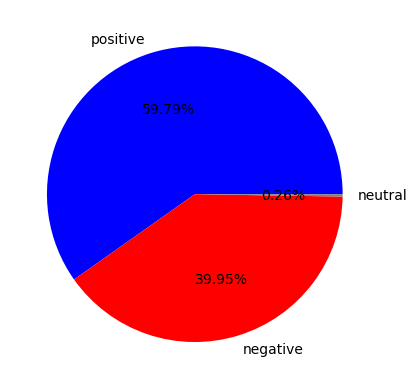

In [43]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['blue', 'red', 'grey'], 
    explode=[0, 0, 0], 
    autopct='%1.2f%%'
    )

plt.show()

In [44]:
sentiment_analysis_df.to_csv("Cleaned_BA_reviews.csv")

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abayieopuni/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

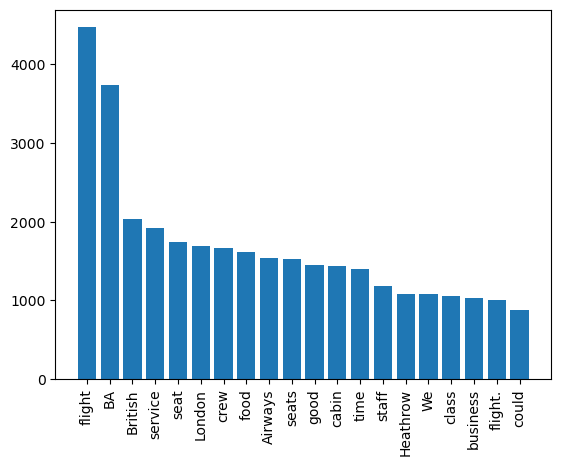

In [47]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

In [52]:
import sys
print(sys.executable)


/Users/abayieopuni/opt/anaconda3/bin/python


In [62]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


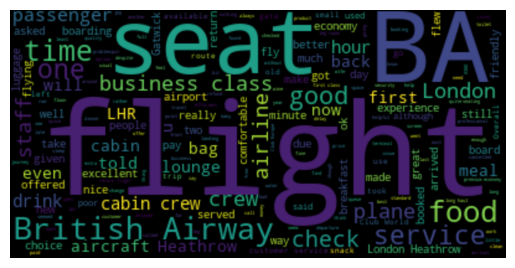

In [65]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'quadric')
plt.axis("off")
plt.show()
